In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Whole Sale Customer data

data = pd.read_csv(r"C:\Users\Bhargavi\Desktop\projectdata.csv",header=0)
# Copy the file to back-up file

data_bk = data.copy()

# display first 5 records

data.head(10)

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0
5,6,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL-PWD,45,45,0
6,7,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Chemical Engineering,4 Years,B.Tech,GEN,422,1479,0
7,8,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Chemical Engineering,4 Years,B.Tech,OBC-NCL,447,974,0
8,9,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Chemical Engineering,4 Years,B.Tech,SC,257,572,0
9,10,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Chemical Engineering,4 Years,B.Tech,ST,161,335,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [4]:
data.isnull().sum()

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [5]:
data_dup=data[data.duplicated(keep='last')] 

In [6]:
col=data.columns[data.dtypes!='object']
col1=data.columns[data.dtypes=='object']
col,col1

(Index(['id', 'year', 'round_no', 'opening_rank', 'closing_rank',
        'is_preparatory'],
       dtype='object'),
 Index(['institute_type', 'quota', 'pool', 'institute_short', 'program_name',
        'program_duration', 'degree_short', 'category'],
       dtype='object'))

In [7]:
#Use LabelEncoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['institute_type']=LE.fit_transform(data[['institute_type']])
data['quota']=LE.fit_transform(data[['quota']])
data['institute_short']=LE.fit_transform(data[['institute_short']])
data['program_name']=LE.fit_transform(data[['program_name']])
data['degree_short']=LE.fit_transform(data[['degree_short']])
data['category']=LE.fit_transform(data[['category']])

In [8]:
#Use LabelEncoder for target variables
from sklearn.preprocessing import LabelBinarizer
LB=LabelBinarizer()
data['pool']=LB.fit_transform(data[['pool']])
data['program_duration']=LB.fit_transform(data[['program_duration']])

In [9]:
#identify the independent and target variables

IndepVar = []
for col in data.columns:
    if col != 'is_preparatory':
        IndepVar.append(col)

TargetVar = 'is_preparatory'

x = data[IndepVar]
y =data[TargetVar]

In [10]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45470, 13), (19488, 13), (45470,), (19488,))

In [11]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [12]:
# Load the Results dataset

HTResults = pd.read_csv(r"C:\Users\Bhargavi\Desktop\internship\HTResults.csv", header=0)

HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    6   919]
 [    6 18557]]
Outcome values : 
 6 919 6 18557
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.01      0.01       925
           0       0.95      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.73      0.50      0.49     19488
weighted avg       0.93      0.95      0.93     19488

Accuracy : 95.3 %
Precision : 50.0 %
Recall : 0.6 %
F1 Score : 0.013
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.3 %
roc_auc_score: 0.503


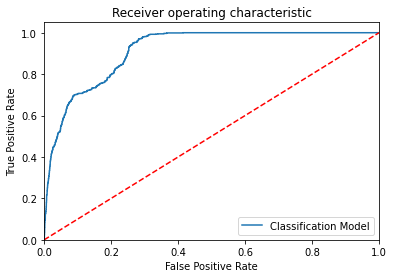

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  812   113]
 [   78 18485]]
Outcome values : 
 812 113 78 18485
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.88      0.89       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.95      0.94      0.94     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.0 %
Precision : 91.2 %
Recall : 87.8 %
F1 Score : 0.895
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 93.7 %
roc_auc_score: 0.937


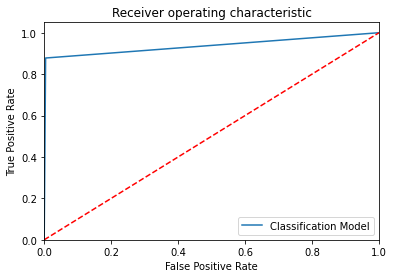

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  852    73]
 [    6 18557]]
Outcome values : 
 852 73 6 18557
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.92      0.96       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.96      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 99.3 %
Recall : 92.1 %
F1 Score : 0.956
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.0 %
roc_auc_score: 0.96


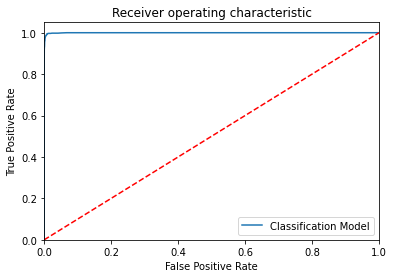

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  862    63]
 [   18 18545]]
Outcome values : 
 862 63 18 18545
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.93      0.96       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.97      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 98.0 %
Recall : 93.2 %
F1 Score : 0.955
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 96.6 %
roc_auc_score: 0.965


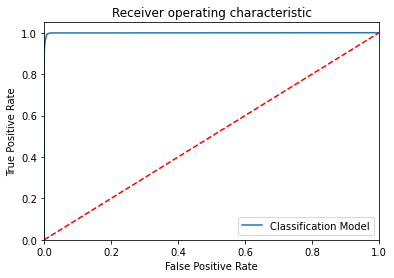

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  779   146]
 [   64 18499]]
Outcome values : 
 779 146 64 18499
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.84      0.88       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.96      0.92      0.94     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 98.9 %
Precision : 92.4 %
Recall : 84.2 %
F1 Score : 0.881
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 92.0 %
roc_auc_score: 0.919


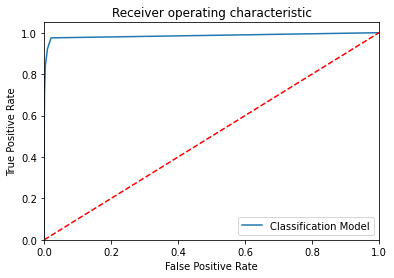

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   71   854]
 [   23 18540]]
Outcome values : 
 71 854 23 18540
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.08      0.14       925
           0       0.96      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.86      0.54      0.56     19488
weighted avg       0.95      0.95      0.94     19488

Accuracy : 95.5 %
Precision : 75.5 %
Recall : 7.7 %
F1 Score : 0.139
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 53.8 %
roc_auc_score: 0.538


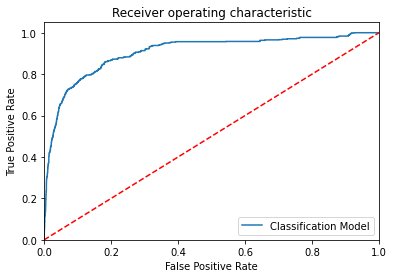

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  861    64]
 [   18 18545]]
Outcome values : 
 861 64 18 18545
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.93      0.95       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.96      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 98.0 %
Recall : 93.1 %
F1 Score : 0.955
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 96.5 %
roc_auc_score: 0.965


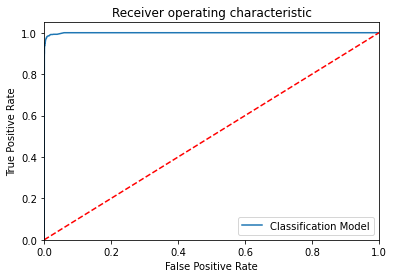

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[  538   387]
 [   35 18528]]
Outcome values : 
 538 387 35 18528
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.58      0.72       925
           0       0.98      1.00      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.96      0.79      0.85     19488
weighted avg       0.98      0.98      0.98     19488

Accuracy : 97.8 %
Precision : 93.9 %
Recall : 58.2 %
F1 Score : 0.718
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 79.0 %
roc_auc_score: 0.79


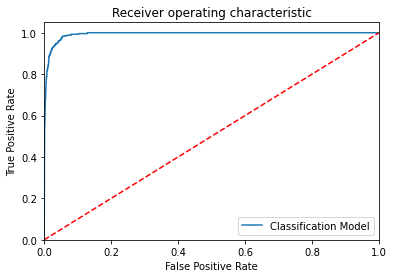

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  872    53]
 [   24 18539]]
Outcome values : 
 872 53 24 18539
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.97      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 97.3 %
Recall : 94.3 %
F1 Score : 0.958
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 97.1 %
roc_auc_score: 0.971


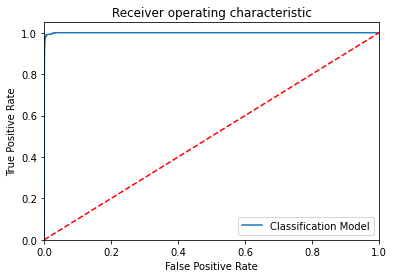

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  925     0]
 [ 5347 13216]]
Outcome values : 
 925 0 5347 13216
Classification report : 
               precision    recall  f1-score   support

           1       0.15      1.00      0.26       925
           0       1.00      0.71      0.83     18563

    accuracy                           0.73     19488
   macro avg       0.57      0.86      0.54     19488
weighted avg       0.96      0.73      0.80     19488

Accuracy : 72.6 %
Precision : 14.7 %
Recall : 100.0 %
F1 Score : 0.257
Specificity or True Negative Rate : 71.2 %
Balanced Accuracy : 85.6 %
roc_auc_score: 0.856


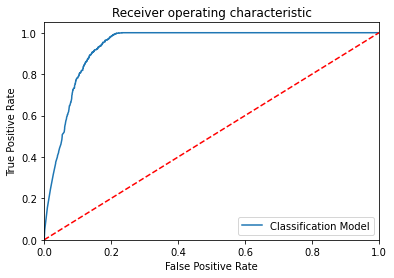

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[    0   925]
 [    0 18563]]
Outcome values : 
 0 925 0 18563
Classification report : 
               precision    recall  f1-score   support

  

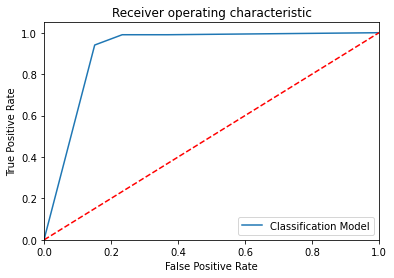

-----------------------------------------------------------------------------------------------------


In [13]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
#import lightgbm as lgb
from sklearn.svm import SVC
# Build the Calssification models and compare the results
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithms with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=1, max_depth=3, eval_metric='mlogloss')
#ModelLGB=lgb.LGBMClassifier()
# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB,ModelXGB ]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [14]:
HTResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,LogisticRegression(),NaN,NaN,NaN,NaN,0.953,0.500,0.006,0.013,1.000,MCC,0.503082,0.503,919.0,6.0,18557.0,6.0
1,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,0.990,0.912,0.878,0.895,0.996,MCC,0.936818,0.937,113.0,78.0,18485.0,812.0
2,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,NaN,0.996,0.993,0.921,0.956,1.000,MCC,0.960379,0.960,73.0,6.0,18557.0,852.0
3,"(ExtraTreeClassifier(random_state=1747858463),...",NaN,NaN,NaN,NaN,0.996,0.980,0.932,0.955,0.999,MCC,0.965461,0.966,63.0,18.0,18545.0,862.0
4,KNeighborsClassifier(),NaN,NaN,NaN,NaN,0.989,0.924,0.842,0.881,0.997,MCC,0.919357,0.920,146.0,64.0,18499.0,779.0
5,SVC(probability=True),NaN,NaN,NaN,NaN,0.955,0.755,0.077,0.139,0.999,MCC,0.537759,0.538,854.0,23.0,18540.0,71.0
6,(DecisionTreeClassifier(random_state=178465570...,NaN,NaN,NaN,NaN,0.996,0.980,0.931,0.955,0.999,MCC,0.964921,0.965,64.0,18.0,18545.0,861.0
7,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,NaN,NaN,0.978,0.939,0.582,0.718,0.998,MCC,0.789868,0.790,387.0,35.0,18528.0,538.0
8,LGBMClassifier(),NaN,NaN,NaN,NaN,0.996,0.973,0.943,0.958,0.999,MCC,0.970705,0.971,53.0,24.0,18539.0,872.0
9,GaussianNB(),NaN,NaN,NaN,NaN,0.726,0.147,1.000,0.257,0.712,MCC,0.855977,0.856,0.0,5347.0,13216.0,925.0
